In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import keras
import random
from keras.layers import Dense, LSTM, Dropout, Masking
from keras.models import Sequential, load_model
from keras.utils import plot_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import *
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import os

In [2]:
with open('../dati/pad/lines_pad.json', 'r') as f:
    data_lines = json.load(f)

with open('../dati/pad/lines_2_pad.json', 'r') as f:
    data_lines += json.load(f)

for elem in range(len(data_lines)):
    for arr in range(len(data_lines[elem])):
        tmp = []
        for f in range(7):
            tmp.append(data_lines[elem][arr][f])
        data_lines[elem][arr] = tmp

In [3]:
with open('../dati/pad/circles_pad.json', 'r') as f:
    data_circles = json.load(f)

for elem in range(len(data_circles)):
    for arr in range(len(data_circles[elem])):
        tmp = []
        for f in range(7):
            tmp.append(data_circles[elem][arr][f])
        data_circles[elem][arr] = tmp
        

In [4]:
with open('../dati/pad/lines_pad.json', 'r') as f:
    data_lines = json.load(f)

with open('../dati/pad/lines_2_pad.json', 'r') as f:
    data_lines += json.load(f)
    

def generator(data, labels):
    assert len(data) == len(labels)
    while True:
        for elem in range(len(data)):
            #word_array = []
            #for arr in range(len(data[elem])):
            #    tmp = []
            #    for f in range(7):
            #        tmp.append(data[elem][arr][f])
            #    word_array.append(tmp)
            yield np.array(data[elem]), np.array(labels[elem])

g_lines = generator(data_lines, [1] * len(data_lines))

In [ ]:
with open('../dati/pad/circles_pad.json', 'r') as f:
    data_circles = json.load(f)
    
g_circles = generator(data_circles, [0] * len(data_circles))

In [10]:
file_recog = 'Antonio_pad_concat_antonio_recognition_pad.json'
file_path = '../dati/scrittura_di_computer/pad/'
labelled_data_d, labelled_data_g = [], []

for file in os.listdir(file_path):
    if os.path.splitext(file)[1] != '.json': continue
    if file_recog == file: continue
    with open(os.path.join(file_path, file), 'r') as f:
        data_g = json.load(f)
    for i in range(len(data_g)):
        labelled_data_g.append((data_g[i], 0))
        
        
with open(os.path.join(file_path, file_recog), 'r') as f:
    data_r = json.load(f)
for i in range(len(data_r)):
    labelled_data_d.append((data_r[i], 1))
    
def xy_data(labelled_data):
    x_data, y_labels = [], []
    for i in labelled_data:
        x_data.append(i[0])
        y_labels.append(i[1])
        
    return np.array(x_data), np.array(y_labels)

labelled_data_dg = labelled_data_d + labelled_data_g  
random.shuffle(labelled_data_dg)

data_dg, label_dg = xy_data(labelled_data_dg)


In [ ]:
def create_model():
    model = Sequential()
    model.add(Masking(mask_value=0.0))
    model.add(LSTM(input_shape=(1000, 7), units=64, activation="sigmoid", return_sequences=True, recurrent_activation="hard_sigmoid"))
    model.add(LSTM(units=128, activation="sigmoid", return_sequences=False, recurrent_activation="hard_sigmoid"))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

In [ ]:
#neural_network = KerasClassifier(build_fn=create_model, 
#                                 epochs=4,
#                                 steps_per_epoch=140,
#                                 validation_split=0.2,
#                                 validation_steps=36,
#                                 verbose=1)

In [ ]:
#plot_model(model_dario, show_shapes=True, to_file='lstm_dropout_model.png')

In [ ]:
#hist = model_dario.fit_generator(g_dario_impostors, epochs=5, steps_per_epoch=42)


In [ ]:
model = create_model()
cb = keras.callbacks.TensorBoard(log_dir='/usr/Graph', histogram_freq=0, batch_size=32, write_graph=True, write_grads=False, write_images=False, embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, embeddings_data=None, update_freq='epoch')

hist = model.fit(x = data_dg, y = label_dg, epochs=110, batch_size=32, callbacks=[cb],validation_split=0.33)

#out = cross_val_score(neural_network, data_dg, label_dg, cv=10,)

Train on 558 samples, validate on 276 samples
Epoch 1/110
558/558 [==============================] - 35s 63ms/step - loss: 0.5082 - acc: 0.7885 - val_loss: 0.3716 - val_acc: 0.8732
Epoch 2/110
558/558 [==============================] - 34s 61ms/step - loss: 0.4587 - acc: 0.8297 - val_loss: 0.3443 - val_acc: 0.8732
Epoch 3/110
558/558 [==============================] - 35s 62ms/step - loss: 0.4262 - acc: 0.8297 - val_loss: 0.3301 - val_acc: 0.8732
Epoch 4/110
558/558 [==============================] - 34s 61ms/step - loss: 0.3788 - acc: 0.8280 - val_loss: 0.2954 - val_acc: 0.8732
Epoch 5/110
558/558 [==============================] - 34s 61ms/step - loss: 0.3357 - acc: 0.8441 - val_loss: 0.3054 - val_acc: 0.8732
Epoch 6/110
558/558 [==============================] - 34s 62ms/step - loss: 0.3074 - acc: 0.8602 - val_loss: 0.2191 - val_acc: 0.9348
Epoch 7/110
558/558 [==============================] - 35s 62ms/step - loss: 0.2660 - acc: 0.9014 - val_loss: 0.1985 - val_acc: 0.9420
Epoch 8/1

Epoch 61/110
558/558 [==============================] - 34s 61ms/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0124 - val_acc: 0.9891
Epoch 62/110
558/558 [==============================] - 34s 61ms/step - loss: 0.0011 - acc: 1.0000 - val_loss: 0.5731 - val_acc: 0.8804
Epoch 63/110
558/558 [==============================] - 34s 60ms/step - loss: 0.2551 - acc: 0.9391 - val_loss: 0.0156 - val_acc: 0.9964
Epoch 64/110
558/558 [==============================] - 34s 61ms/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0077 - val_acc: 0.9964
Epoch 65/110
558/558 [==============================] - 34s 61ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 66/110
558/558 [==============================] - 34s 61ms/step - loss: 8.9206e-04 - acc: 1.0000 - val_loss: 0.0020 - val_acc: 1.0000
Epoch 67/110
558/558 [==============================] - 34s 61ms/step - loss: 0.1746 - acc: 0.9624 - val_loss: 0.1178 - val_acc: 0.9529
Epoch 68/110
558/558 [======================

In [ ]:
#model.save('model_antonio_good_performance_65_instanze.h5')
#out
#!git config --global user.email "antoniomusolino007@gmail.com"
#!git stash --include-untracked
!git add ../.
!git commit -m 'nuove curve'
!git pull
#!git merge
!git push
#print(out)
#out.mean()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def gen_mean (curve):
    mean = [0]* len(curve)
    mean[0] = curve[0]
    for i in range(1,len(curve)):
        mean[i] = ((mean[i-1] )*i + out[i])/(i+1)
    return mean
from scipy.ndimage.filters import gaussian_filter1d


plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Learn', 'Test'], loc='lower right')
plt.savefig('./150_epoch_accuracy_new_data_Manuel')

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('./model_accuracy_40Epoch_scaled',quality=100,)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#model.save('model_giulio_good_performance_23.h5')
#plt.savefig('./model_loss_40Epoch_scaled')

In [48]:
model_manuel = load_model('model_manuel_good_performance.h5')
model_giovanni = load_model('model_giovanni_good_performance.h5')
model_dario_reloaded = load_model("model_dario_good_performance.h5")
model_antonio_reloaded = load_model('model_antonio_good_performance_65_instanze.h5')




In [ ]:
x, y = xy_data(labelled_data_g)
x1, y1, = xy_data(labelled_data_d)
out_dario_reloaded = model_dario_reloaded.evaluate(x, y)
out_dario_reloaded2 = model_dario_reloaded.evaluate(x1, y1)

print(out_dario_reloaded)
print(out_dario_reloaded2)

In [47]:
with open(os.path.join('../dati/scrittura_di_computer/' ,'antonio_76_volte_pad.json'), 'r') as f:
    check = json.load(f)

check = np.array(check)
print(check.shape)

model_antonio_reloaded.evaluate(check, np.ones(check.shape[0]))


(76, 1000, 7)
76/76 [==============================] - 2s 20ms/step


[0.06141953983981358, 0.9868421084002444]

In [50]:


data_value = np.concatenate((data_dg, check))
lable_value = np.concatenate((label_dg, np.ones(check.shape[0])))

predict = model_antonio_reloaded.predict(data_value).ravel()

#classification_report(lable_value, predict)
#print(model_giovanni.evaluate(data_dg, label_dg))
#print(model_manuel.evaluate(data_dg, label_dg))
#print(model_antonio_reloaded.evaluate(data_dg, label_dg))
#attack
predict

array([1.84370333e-06, 2.08774509e-06, 3.75387299e-06, 1.39952829e-06,
       2.26093857e-06, 1.79741055e-05, 2.83092504e-06, 7.37263804e-07,
       6.44855709e-06, 7.52337519e-06, 2.48218203e-05, 7.19082948e-07,
       2.14701527e-06, 5.64987249e-06, 1.39370441e-05, 7.65337536e-05,
       1.02461154e-05, 2.84167118e-06, 2.06801019e-06, 8.46866169e-06,
       3.29693557e-06, 1.73625938e-06, 5.62416062e-06, 2.34268941e-06,
       9.99145269e-01, 1.33383810e-06, 1.80017414e-05, 3.25551241e-06,
       1.53868541e-06, 1.44932210e-06, 8.05695527e-06, 6.08462187e-06,
       2.99236926e-05, 9.35875141e-06, 2.96213402e-04, 6.79248187e-05,
       1.45282456e-06, 9.99856114e-01, 1.84447185e-06, 1.99272326e-05,
       2.84901421e-06, 1.28378838e-06, 7.00373846e-07, 1.29499458e-05,
       4.76060632e-06, 4.49932922e-05, 9.99928236e-01, 1.68307474e-06,
       2.70249893e-06, 3.79845892e-06, 9.57761245e-07, 9.99900460e-01,
       9.50875801e-06, 4.71382100e-06, 3.56635996e-06, 2.36690471e-06,
      

In [53]:


target_names = ['rejection', 'acceptance']
rep = classification_report(lable_value, predict,target_names=target_names)
#print(rep)
roc_auc_score(lable_value,predict)

1.0

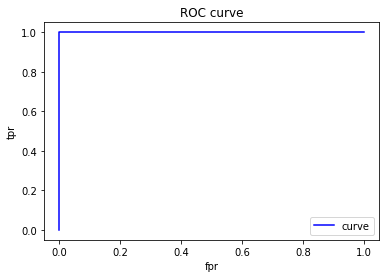

In [16]:


roc_auc = metrics.auc(fpr_keras, tpr_keras)

plt.plot(fpr_keras,tpr_keras,'b', label = 'AUC = %0.2f' % roc_auc)
plt.title('ROC curve')
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.legend(['curve'], loc='lower right')
plt.savefig('ROC_curve_Antonio_Ultima')